In [94]:
import os
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [ ]:
folder_path = 'denseSubset'
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
dataframes = []

for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.to_csv('denseSubset_all.csv', index=False)

In [5]:
# Load the CSV file
file_path = "denseSubset_all.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Count unique values in a specific column
column_name = "participent_id"
unique_counts = df[column_name].value_counts()

# Display unique counts
print(unique_counts)

participent_id
[False, '6752ee5067db1e656b49e9f6', None]    301
[False, '614ea93d581d6f4281e9d232', None]    122
[False, '5d47901043518d0017bf3c04', None]    103
[False, '66d5353794a257d22919673b', None]    101
[False, '670075d557d79b4cef60c761', None]     97
                                            ... 
[False, '653f2424042d03012eb92ef5', None]      1
[False, '5e00f9a211999fcea4169800', None]      1
[False, '6466249c27b5e4161f763c32', None]      1
[False, 'Isaiah_test', None]                   1
[False, '672643eb751f8e797bb74788', None]      1
Name: count, Length: 1851, dtype: int64


In [101]:
df.rename(columns={'participent_id': 'PID'}, inplace=True)
result = (
    df[['transcript_id', 'PID']]  # Select relevant columns
    .groupby('transcript_id', as_index=False)  # Group by 'transcript_id'
    .agg(number_annotators=pd.NamedAgg(column='PID', aggfunc=lambda x: x.nunique(dropna=True)))  # Aggregate with unique count
    .sort_values(by='number_annotators', ascending=False)  # Sort in descending order
)
result.to_csv("transcript_count.csv", index=False)
print (result)


                            transcript_id  number_annotators
125  aaa30e9f-886f-403f-a16e-6eff8b86f565                 12
32   2fae6aa6-182c-4caf-84d3-09bd505cb5e1                 12
47   42d99fff-daee-41bc-ba4a-55b6a787e51d                 11
152  c0baec1b-3132-4177-941b-c18aec0be57e                 11
34   310ce55b-8db0-4407-a25c-c2460b37cce5                 11
..                                    ...                ...
90   7c80ae4c-14c0-469b-b254-6ea3dc876e24                  6
46   419c2d57-3d26-4c4e-a5a5-de392846532f                  6
38   358be89b-e916-4553-8f40-f9dcd1da006e                  6
8    0a294776-ca94-4114-bc24-2bf3b0a0a813                  5
18   19c78684-fc44-482c-a0d3-d19223b4ba65                  5

[201 rows x 2 columns]
                            transcript_id  number_annotators  \
125  aaa30e9f-886f-403f-a16e-6eff8b86f565                 12   
32   2fae6aa6-182c-4caf-84d3-09bd505cb5e1                 12   
47   42d99fff-daee-41bc-ba4a-55b6a787e51d           

In [ ]:
# Rename participant ID column to PID

# Count number of annotated transcripts
num_transcripts = df['transcript_id'].nunique()
print(f"Number of annotated transcripts: {num_transcripts}")

# Display number of annotations per participant
annotations_per_participant = df.groupby('PID')['new_topic'].nunique().reset_index()
annotations_per_participant.rename(columns={'new_topic': 'num_annotations'}, inplace=True)

# Exclude participants with 6 or fewer or 40 or greater annotations
exclude_by_ann_number = annotations_per_participant[(annotations_per_participant['num_annotations'] <= 6) | (annotations_per_participant['num_annotations'] >= 40)]

# List of participant IDs to exclude
exclude_by_ann_number_list = exclude_by_ann_number['PID'].dropna().tolist()

# Show exclusion count
print(f"Number of participants excluded due to below/over annotation thresholds: {len(exclude_by_ann_number_list) - 1}")

# Exclude participants from raw data
raw_excluded = df[~df['PID'].isin(exclude_by_ann_number_list)]

# Print final number of included participants
final_participants = raw_excluded['PID'].nunique()
print(f"Final number of included participants: {final_participants}")

# transcript summary stats for the dashboard
transcript_summary_data = (
    raw_excluded[['transcript_id', 'PID', 'turn_id']]
    .groupby('transcript_id', as_index=False)
    .agg(
        number_annotators=pd.NamedAgg(column='PID', aggfunc=lambda x: x.nunique(dropna=True)),
        annotators=pd.NamedAgg(column='PID', aggfunc=lambda x: list(x.dropna().unique())),
        _turn_count=pd.NamedAgg(column='turn_id', aggfunc=lambda x: x.nunique(dropna=True))
    )
)
# transcript_summary_data['avg_annotations'] = (
#     transcript_summary_data['_turn_count'] / transcript_summary_data['number_annotators']
# )
transcript_summary_data = transcript_summary_data.drop(columns=['_turn_count'])

display(transcript_summary_data)

Number of annotated transcripts: 201
Number of participants excluded due to below/over annotation thresholds: 345
Final number of included participants: 1505


,transcript_id,number_annotators,annotators,avg_annotations
0,01849238-f5f0-487e-bca4-7b4fe0c9625c,8,"[[False, '66bdfaf566dfad11cf7db0a5', None], [F...",10.750000
1,01a4c01c-cf0e-4f37-ab2b-641bb604af30,6,"[[False, '669bbdcdb3fe0784d521b666', None], [F...",16.833333
2,04542d1a-168a-4f90-b7e3-33adb675525f,9,"[[False, '5a94d2e989de8200013ecab6', None], [F...",7.555556
3,0542c0f0-6c1e-4e54-b3df-afa48b19f9b5,4,"[[False, '66aa422e7db861629d0a7ddf', None], [F...",17.750000
4,06afb9c1-b367-45c7-a9ff-74c47a2cb61c,8,"[[False, '5d612ae16512d700159face7', None], [F...",10.500000
...,...,...,...,...
195,fa720f08-9b4a-4fb0-94e9-8cae8d24a5b1,8,"[[False, '666c432f595532849ff980c2', None], [F...",9.750000
196,fca231e3-c8d1-4e97-b015-94b6c5f505a1,6,"[[False, '6650e7ed4228b3625176fe7f', None], [F...",8.833333
197,fd31814a-0410-4a33-83ff-cb042367e832,5,"[[False, '675e9946241b084b8961bf80', None], [F...",15.200000
198,fe37221d-0db4-43d3-8ceb-41b9c2d917eb,10,"[[False, '66117f37fcd4906df14f36af', None], [F...",7.100000


0.4925930150749671
                                            PID  match_rate
0     [False, '542498adfdf99b691fb384d1', None]    0.709677
1     [False, '5563984afdf99b672b5749b6', None]    0.480000
2     [False, '5588ee6ffdf99b304dd48297', None]    0.560000
3     [False, '558c1c5dfdf99b5d806a0017', None]    0.636364
4     [False, '55a9f6a1fdf99b2d81b5295f', None]    0.428571
...                                         ...         ...
1500  [False, '67647b34f3bf689f8ffc2edf', None]    0.303030
1501  [False, '676482f92cdae29465ae1f61', None]    0.642857
1502  [False, '67649f211a2aa70fbd93f9ab', None]    0.428571
1503  [False, '6764bf98683f224b874dc304', None]    0.300000
1504  [False, '676617bb94b4d0cf1a6a4257', None]    0.344828

[1505 rows x 2 columns]

Consensus Count, Average Annotation Count, and Lowest num_annotators per Transcript:


,transcript_id,number_annotators,consensus_count,avg_annotation_count,avg_participant_match_rate,annotators
0,01849238-f5f0-487e-bca4-7b4fe0c9625c,8,25,26.75,0.56,"[[False, '66bdfaf566dfad11cf7db0a5', None], [F..."
1,01a4c01c-cf0e-4f37-ab2b-641bb604af30,6,15,26.17,0.36,"[[False, '669bbdcdb3fe0784d521b666', None], [F..."
2,04542d1a-168a-4f90-b7e3-33adb675525f,9,18,19.11,0.47,"[[False, '5a94d2e989de8200013ecab6', None], [F..."
3,0542c0f0-6c1e-4e54-b3df-afa48b19f9b5,4,2,21.50,0.12,"[[False, '66aa422e7db861629d0a7ddf', None], [F..."
4,06afb9c1-b367-45c7-a9ff-74c47a2cb61c,8,26,25.00,0.59,"[[False, '5d612ae16512d700159face7', None], [F..."
...,...,...,...,...,...,...
195,fa720f08-9b4a-4fb0-94e9-8cae8d24a5b1,8,17,19.25,0.49,"[[False, '666c432f595532849ff980c2', None], [F..."
196,fca231e3-c8d1-4e97-b015-94b6c5f505a1,6,12,17.33,0.52,"[[False, '6650e7ed4228b3625176fe7f', None], [F..."
197,fd31814a-0410-4a33-83ff-cb042367e832,5,11,23.20,0.34,"[[False, '675e9946241b084b8961bf80', None], [F..."
198,fe37221d-0db4-43d3-8ceb-41b9c2d917eb,10,17,19.90,0.44,"[[False, '66117f37fcd4906df14f36af', None], [F..."


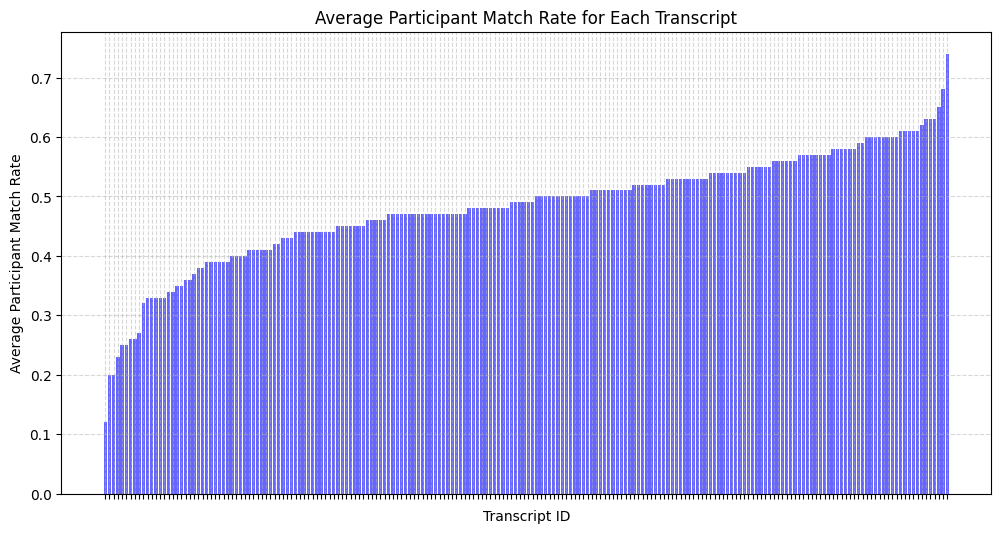

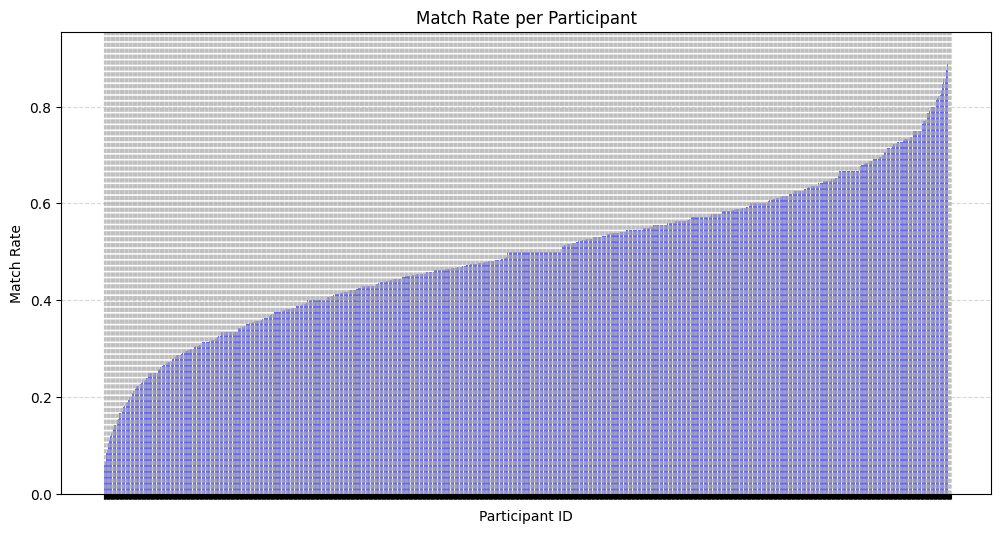

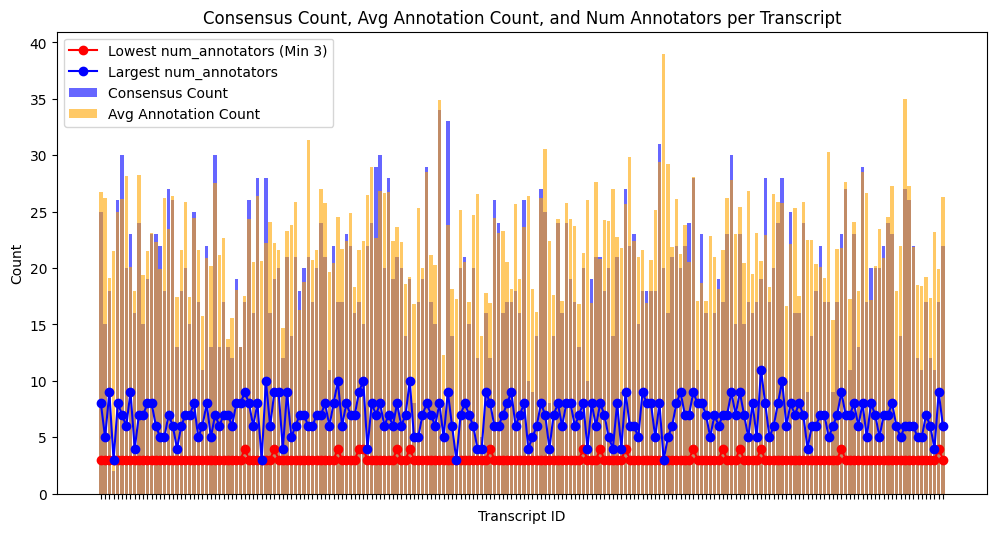

In [ ]:
# Count the number of times each turn_id was marked by different participants
turn_counts = raw_excluded.groupby(['transcript_id', 'turn_id'])['PID'].nunique().reset_index()
# print(turn_counts)
turn_counts.rename(columns={'PID': 'num_annotators'}, inplace=True)
final_consensus_list = []
transcript_annotation_counts = []

dashboard_summary = []
for transcript_id, transcript_group in turn_counts.groupby('transcript_id'):
    # set the consensus number to be similiar to avg annotation number
    total_annotations = raw_excluded[raw_excluded['transcript_id'] == transcript_id]['turn_id'].count()
    num_participants = raw_excluded[raw_excluded['transcript_id'] == transcript_id]['PID'].nunique()
    avg_annotation_count = total_annotations / num_participants if num_participants > 0 else 0
    
    # Select the minimum annotator agreement for consensus number to be similiar
    sorted_counts = transcript_group['num_annotators'].sort_values(ascending=False).values
    cumulative_counts = np.cumsum(sorted_counts > 0)
    # find index and then find threshold number of annotators
    optimal_threshold = max(3, sorted_counts[np.argmin(np.abs(cumulative_counts - avg_annotation_count))])
    consensus_annotations = transcript_group[transcript_group['num_annotators'] >= optimal_threshold].copy()
    consensus_annotations.sort_values(by='turn_id', inplace=True)
    
    # test to see the threshold and largest num_annotators
    lowest_num_annotators = max(3, consensus_annotations['num_annotators'].min())
    largest_num_annotators = consensus_annotations['num_annotators'].max()
    
    # built consensus
    MERGE = 3
    BUFFER = 0
    prev_turn = None
    final_transcript_consensus = []
    
    for _, row in consensus_annotations.iterrows():
        turn_id = row['turn_id']
        if prev_turn is not None and (turn_id - prev_turn) <= (MERGE + BUFFER):
            continue
        final_transcript_consensus.append(row)
        prev_turn = turn_id
    
    final_consensus_list.extend(final_transcript_consensus)
    
    consensus_count = len(final_transcript_consensus)
    dashboard_summary.append({
        'transcript_id': transcript_id, 
        'number_annotators': num_participants,
        'consensus_count': consensus_count, 
        'avg_annotation_count': round(avg_annotation_count, 2),
    })

    transcript_annotation_counts.append({
        'transcript_id': transcript_id, 
        'number_annotators': num_participants,
        'consensus_count': consensus_count, 
        'avg_annotation_count': round(avg_annotation_count, 2),
        'lowest_num_annotators': lowest_num_annotators,
        'largest_num_annotators': largest_num_annotators
    })

final_consensus_df = pd.DataFrame(final_consensus_list)
transcript_annotation_counts_df = pd.DataFrame(transcript_annotation_counts)

summary_df = pd.DataFrame(dashboard_summary)

# Expand consensus range for buffer
expanded_consensus_list = []
for _, row in final_consensus_df.iterrows():
    transcript_id = row['transcript_id']
    turn_id = row['turn_id']
    for expanded_turn_id in range(turn_id - BUFFER, turn_id + BUFFER + 1):
        expanded_consensus_list.append({'transcript_id': transcript_id, 'turn_id': expanded_turn_id})

###############
# DASHBOARD CSV - consensus_turn_ids.csv
###############
# Output the consensus turn IDs into a CSV file
final_consensus_df[['transcript_id', 'turn_id']].to_csv('consensus_turn_ids.csv', index=False)

expanded_consensus_df = pd.DataFrame(expanded_consensus_list)

# find individual matches
matches_per_participant = raw_excluded[raw_excluded.set_index(['transcript_id', 'turn_id']).index.isin(expanded_consensus_df.set_index(['transcript_id', 'turn_id']).index)]

# match rate for each participant per transcript
participant_match_rates = matches_per_participant.groupby(['transcript_id', 'PID']).size() / raw_excluded.groupby(['transcript_id', 'PID']).size()
participant_match_rates = participant_match_rates.reset_index()
participant_match_rates.columns = ['transcript_id', 'PID', 'match_rate']


###############
# DASHBOARD CSV - concensus_matchrates.csv
###############
participant_match_rates.to_csv('concensus_matchrates.csv', index=False)

# overall match rate per participant
overall_participant_match_rates = participant_match_rates.groupby('PID')['match_rate'].mean().reset_index()

# low_match_participants = overall_participant_match_rates[overall_participant_match_rates['match_rate'] < 0.3]
# # Display the list of participant IDs and their match rates
# print(low_match_participants)

print(overall_participant_match_rates['match_rate'].mean())
print(overall_participant_match_rates)

# bar graph match rate for each participant per transcript
plt.figure(figsize=(12, 6))
participant_avg_match_rates = round(participant_match_rates.groupby('transcript_id')['match_rate'].mean(),2).reset_index()
participant_avg_match_rates = participant_avg_match_rates.sort_values(by='match_rate')

# Merge the participant_avg_match_rates into summary_df
summary_df = pd.merge(
    summary_df,
    participant_avg_match_rates[['transcript_id', 'match_rate']],
    on='transcript_id',
    how='left'
)
summary_df = pd.merge(
    summary_df,
    transcript_summary_data[['transcript_id', 'annotators']],
    on='transcript_id',
    how='left'
)
summary_df.rename(columns={'match_rate': 'avg_participant_match_rate'}, inplace=True)
###############
# DASHBOARD CSV - transcript_summary_data.csv
###############
summary_df.to_csv("transcript_summary_data.csv", index=False)

print("\nConsensus Count, Average Annotation Count, and Lowest num_annotators per Transcript:")
display(summary_df)

plt.bar(participant_avg_match_rates['transcript_id'], participant_avg_match_rates['match_rate'], color='blue', alpha=0.6)
plt.xlabel('Transcript ID')
plt.gca().set_xticklabels([])
plt.ylabel('Average Participant Match Rate')
plt.title('Average Participant Match Rate for Each Transcript')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Bar graph of overall match rate per participant
overall_participant_match_rates = overall_participant_match_rates.sort_values(by='match_rate')
plt.figure(figsize=(12, 6))
plt.bar(overall_participant_match_rates['PID'], overall_participant_match_rates['match_rate'], color='blue', alpha=0.6)
plt.xlabel('Participant ID')
plt.gca().set_xticklabels([])
plt.ylabel('Match Rate')
plt.title('Match Rate per Participant')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Consensus Count and stuff
plt.figure(figsize=(12, 6))
plt.bar(transcript_annotation_counts_df['transcript_id'], transcript_annotation_counts_df['consensus_count'], color='blue', alpha=0.6, label='Consensus Count')
plt.bar(transcript_annotation_counts_df['transcript_id'], transcript_annotation_counts_df['avg_annotation_count'], color='orange', alpha=0.6, label='Avg Annotation Count')
plt.plot(transcript_annotation_counts_df['transcript_id'], transcript_annotation_counts_df['lowest_num_annotators'], color='red', marker='o', linestyle='-', label='Lowest num_annotators (Min 3)')
plt.plot(transcript_annotation_counts_df['transcript_id'], transcript_annotation_counts_df['largest_num_annotators'], color='blue', marker='o', linestyle='-', label='Largest num_annotators')
plt.xlabel('Transcript ID')
plt.gca().set_xticklabels([])
plt.ylabel('Count')
plt.title('Consensus Count, Avg Annotation Count, and Num Annotators per Transcript')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [95]:
low_match_participants = overall_participant_match_rates[overall_participant_match_rates['match_rate'] < 0.3]

# Display the list of participant IDs and their match rates
print(low_match_participants)

low_consensus = df[df['PID'].isin(low_match_participants['PID'])]

display(low_consensus)

                                            PID  match_rate
91    [False, '5bd3ff16b209800001bed096', None]    0.047619
904   [False, '66aa422e7db861629d0a7ddf', None]    0.058824
1057  [False, '66fafb2e9a9131b2fc823cf5', None]    0.058824
1112  [False, '6712b5a345c966536d238ebc', None]    0.064516
1186  [False, '67258b6578a5573e201e3185', None]    0.076923
...                                         ...         ...
1290  [False, '67365ed3b67ea306e17a5b6a', None]    0.294118
525   [False, '657484ce078a676a635baf39', None]    0.296296
1216  [False, '672aaca9cbfcfdb0f8ddee39', None]    0.296296
814   [False, '667dcf1309a59ce9ec44022b', None]    0.296296
924   [False, '66b223d532199c29ed32c8f4', None]    0.297297

[153 rows x 2 columns]


,turn_id,speaker,currentUtterance,previous_topic,new_topic,PID,time,transcript_id
708,2,5f78dc19c0ca6c1197e189ab,Hello?,Starting The Call,greetings,"[False, '67365ed3b67ea306e17a5b6a', None]",1.734755e+12,c0775391-b8c3-4884-aaec-ff8b1b5d1de4
709,5,5fa19ff29675d12de2935107,I'm going to finish writing these directions.,greetings,A task,"[False, '67365ed3b67ea306e17a5b6a', None]",1.734755e+12,c0775391-b8c3-4884-aaec-ff8b1b5d1de4
710,14,5f78dc19c0ca6c1197e189ab,"Oh, don't play those games. Okay. I live in th...",A task,residence,"[False, '67365ed3b67ea306e17a5b6a', None]",1.734755e+12,c0775391-b8c3-4884-aaec-ff8b1b5d1de4
711,45,5fa19ff29675d12de2935107,"Well, no, I finished my PhD a few years ago. I...",residence,career,"[False, '67365ed3b67ea306e17a5b6a', None]",1.734755e+12,c0775391-b8c3-4884-aaec-ff8b1b5d1de4
712,56,5f78dc19c0ca6c1197e189ab,came back from like a deployment. So like the ...,career,adventure,"[False, '67365ed3b67ea306e17a5b6a', None]",1.734755e+12,c0775391-b8c3-4884-aaec-ff8b1b5d1de4
...,...,...,...,...,...,...,...,...
44154,431,5ebea06f9d56a105c10f6315,at Yankee Stadium which is very convenient to ...,back to general sport,more stadium specific and references e.gh parking,"[False, '6266a4e5846e1e41812a0432', None]",1.734680e+12,5c91528b-686c-4446-82dc-5dd830d4d7b1
44155,447,5ebea06f9d56a105c10f6315,100%. But I think that's that's true for I thi...,more stadium specific and references e.gh parking,back to general sports talk witrh refs to loca...,"[False, '6266a4e5846e1e41812a0432', None]",1.734680e+12,5c91528b-686c-4446-82dc-5dd830d4d7b1
44156,487,5ebea06f9d56a105c10f6315,itself and really sort of like Especially yeah...,back to general sports talk witrh refs to loca...,less specific sports chat,"[False, '6266a4e5846e1e41812a0432', None]",1.734680e+12,5c91528b-686c-4446-82dc-5dd830d4d7b1
44157,495,5ebea06f9d56a105c10f6315,Yeah and it's crazy anywhere like in Italy if ...,less specific sports chat,historical chat,"[False, '6266a4e5846e1e41812a0432', None]",1.734680e+12,5c91528b-686c-4446-82dc-5dd830d4d7b1
